In [2]:
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
titanik_train = pd.read_csv('./data/train.csv', index_col = 0)
titanik_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanik_train.shape


(891, 11)

In [5]:
titanik_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanik_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

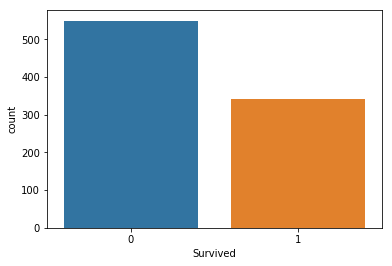

In [7]:
sns.countplot(titanik_train['Survived'])

In [8]:
titanik_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
cols = ['Name','Sex', 'Pclass', 'SibSp', 'Parch',  'Embarked']

In [11]:
titanik_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
titanik_train.pivot_table('Survived', index ='Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


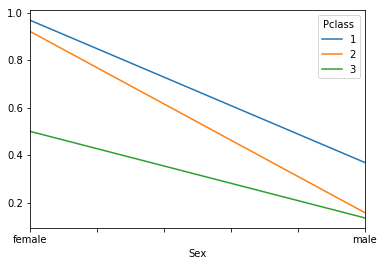

In [13]:
titanik_train.pivot_table('Survived', index ='Sex', columns = 'Pclass').plot()

In [14]:
age = pd.cut(titanik_train['Age'], [0,18,80])
titanik_train.pivot_table('Survived', ['Sex', age], 'Pclass')
             

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [15]:
titanik_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [72]:
# titanik.dropna()
titanik_train['Age'].fillna(value=titanik_train['Age'].mean(), inplace=True)


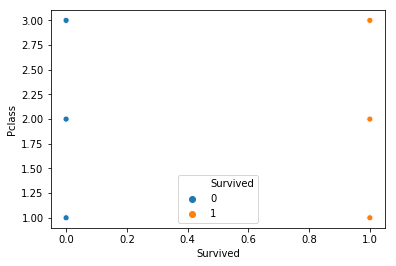

In [39]:
sns.scatterplot(x='Survived', y='Pclass', data=titanik_train, hue='Survived')

In [40]:
titanik_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
# titanik.dropna(inplace = True)

In [52]:
X = titanik_train[['Pclass', 'Age', 'SibSp']]

y = titanik_train['Survived']

In [53]:
X.shape, y.shape

((891, 3), (891,))

In [54]:
X.head(1)

,Pclass,Age,SibSp
PassengerId,,,
1,3,22.0,1


In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)

In [56]:
Xtrain.shape, Xtest.shape

((445, 3), (446, 3))

In [57]:
ytrain.shape, ytest.shape

((445,), (446,))

In [58]:
m = LogisticRegression() #define model


In [59]:
m.fit(Xtrain, ytrain) # training

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
training_score = m.score(Xtrain, ytrain)
training_score

0.7078651685393258

## predictions

In [73]:
test_score = m.score(Xtest, ytest) # test result for unseen data
test_score

0.6816143497757847

In [74]:
m.predict(Xtest)

# m.predict(X_test.loc[449, ['Pclass']])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,

## perpare submission for Kaggel


In [63]:
titanic_kaggel = pd.read_csv('test.csv', index_col = 0)
titanic_kaggel.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
X_kaggel = titanic_kaggel[['Pclass', 'Age', 'SibSp']]


In [65]:
X_kaggel.head()

,Pclass,Age,SibSp
PassengerId,,,
892,3,34.5,0
893,3,47.0,1
894,2,62.0,0
895,3,27.0,0
896,3,22.0,1


In [66]:
X_kaggel.isna().sum()

Pclass     0
Age       86
SibSp      0
dtype: int64

In [67]:
X_kaggel['Age'].fillna(value=X_kaggel['Age'].mean(), inplace=True)
# titanic['SibSp'].fillna(value=titanic['SibSp'].mean(), inplace=True)
# titanic['Pclass'].fillna(value=titanic['Pclass'].mean(), inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
# X_kaggel.isna().sum()

In [71]:

y_pred_kaggel = m.predict(X_kaggel)

submission = pd.DataFrame(y_pred_kaggel, index=X_kaggel.index, columns = ['Survived'])


submission.to_csv('submission.csv', index=True)

submission


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0
